# Practical 12: Reinforcement Learning

Reinforcement learning (RL) is a machine learning (ML) technique that trains software to make decisions to achieve the most optimal results. It mimics the trial-and-error learning process that humans use to achieve their goals. Software actions that work towards your goal are reinforced, while actions that detract from the goal are ignored.

RL algorithms use a reward-and-punishment paradigm as they process data. They learn from the feedback of each action and self-discover the best processing paths to achieve final outcomes. The algorithms are also capable of delayed gratification. The best overall strategy may require short-term sacrifices, so the best approach they discover may include some punishments or backtracking along the way. RL is a powerful method to help artificial intelligence (AI) systems achieve optimal outcomes in unseen environments.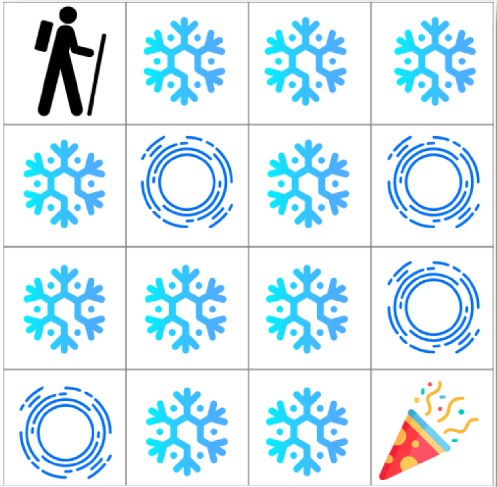

### Q* Learning with FrozenLake

The goal of this game is to go from the starting state (S) to
the goal state (G) by walking only on frozen tiles (F) and
avoid holes (H). However, the ice is slippery, so you won't
always move in the direction you intend (stochastic
environment)

In [ ]:
import numpy as np
import gym
import random

In [ ]:
env = gym.make("FrozenLake-v1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

In [ ]:
alpha = 0.7
gamma = 0.95
epsilon = 1.0

In [14]:
num_episodes = 10000
for episode in range(num_episodes):
  state = env.reset()
  done = False

  while not done:
    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(q_table[state, :])

    next_state, reward, done, _ = env.step(action)

    q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]))

    state = next_state

In [15]:
num_episodes = 100
num_success = 0
for episode in range(num_episodes):
  state = env.reset()
  done = False

  while not done:
    action = np.argmax(q_table[state, :])
    next_state, reward, done, _ = env.step(action)

    state = next_state

    if done and reward == 1:
      num_success += 1

success_rate = num_success/num_episodes

In [16]:
success_rate

0.15